In [1]:
import pickle
import time
import datetime
import os.path
import matplotlib.pyplot as plt
import numpy as np

f = open('history.dat', 'rb')
history_arr = pickle.load(f)


In [2]:
def make_chart_arr(arr):
    
    tm = []
    val = []
    
    for v in arr:
        open =  float(v[1])
        high =  float(v[2])
        low =   float(v[3])
        close = float(v[4])
        
        start_time = v[0]
        end_time = v[6]
        
        tm.append(start_time)
        val.append(open)

        tm.append(int(start_time+(end_time-start_time)/4))
        val.append(high)
        
        tm.append(int(start_time+(end_time-start_time)*3/4))
        val.append(low)

        tm.append(end_time)
        val.append(close)
    
    return [tm,val]






In [3]:
def findDateIndex(date):
    unix_time = int(datetime.datetime.timestamp(date)*1000)
    index = 0
    for v in history_arr:
        if v[0]>=unix_time:
            break
        index += 1;
    return index
    
from_index = findDateIndex(datetime.datetime(2022, 7, 13, 0, 0,0))
#to_index = findDateIndex(datetime.datetime(2022, 7, 12, 21, 55, 47))

#x,y = make_chart_arr(history_arr)
#x,y = make_chart_arr(history_arr[from_index:to_index])
x,y = make_chart_arr(history_arr[from_index:])

date_time = datetime.datetime.fromtimestamp(x[0]/1000)
print("from=", date_time.strftime('%Y-%m-%d %H:%M:%S'))

date_time = datetime.datetime.fromtimestamp(x[-1]/1000)
print("to=", date_time.strftime('%Y-%m-%d %H:%M:%S'))



from= 2022-07-13 00:00:00
to= 2022-08-09 12:12:59


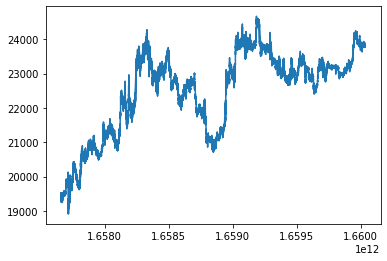

In [4]:

plt.plot(x,y)
plt.show()

In [19]:
min_price = min(y)
max_price = max(y)
step_val = 500
steps_count=int((max_price-min_price)/step_val)+1

print(min_price,max_price,steps_count)

step_prices = np.zeros((steps_count,), dtype=float)
for i in range(0,steps_count):
    step_prices[i] = min_price +i*step_val
#print(step_prices)


18910.94 24668.0 12


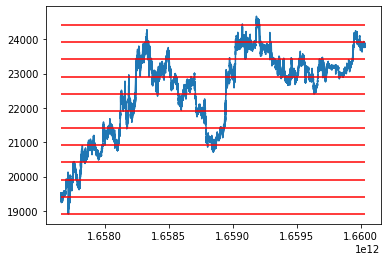

In [20]:
plt.plot(x,y)

for p in step_prices:
    plt.hlines(p,x[0],x[-1],color='red')
plt.show()

In [21]:
up_freq = np.zeros((steps_count,), dtype=int)
down_freq = np.zeros((steps_count,), dtype=int)

step = int((y[0]-min_price)/step_val)
prev_price = min_price+step*step_val

for price in y:
    step = int((price-min_price)/step_val)
    step_price = min_price+step*step_val
    
    if price>prev_price+step_val:
        down_freq[step] += 1
        #print("price=",price, "step=", step, "step_price=", step_price,"prev_price=",  prev_price)
        #print("from down step=", step,"freq=",down_freq[step])
        prev_price = step_price
    elif price+step_val<prev_price:
        up_freq[step+1] += 1
        #print("price=",price, "step=", step, "step_price=", step_price,"prev_price=",  prev_price)
        #print("from up step=", step+1,"freq=",up_freq[step+1])
        prev_price = step_price+step_val
        
#for i in range(0,steps_count):
#    diff = down_freq[i]-up_freq[i]
#    if diff != 0:
#        print(i, diff)     
        




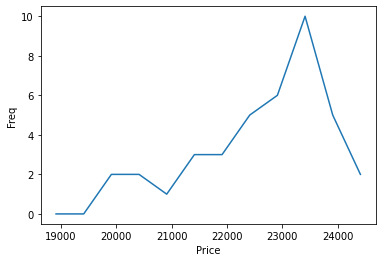

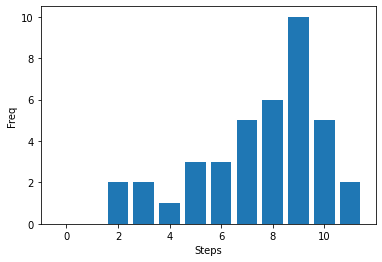

In [22]:
plt.plot(step_prices,down_freq)
plt.xlabel('Price');
plt.ylabel('Freq');
plt.show()

plt.bar(range(0,steps_count), down_freq)
plt.xlabel('Steps');
plt.ylabel('Freq');
plt.show()

In [23]:
print("played steps: min:",min(down_freq),"avg:",sum(down_freq)/steps_count,"max:",max(down_freq))

played steps: min: 0 avg: 3.25 max: 10


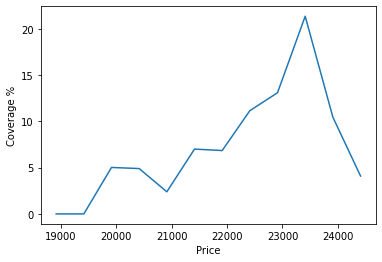

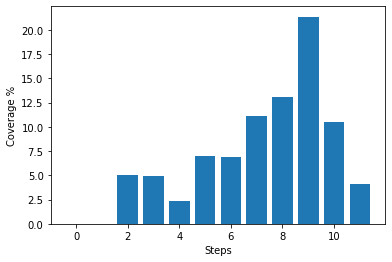

In [24]:
freq_fill = np.zeros((steps_count,), dtype=float)

for i in range(0,steps_count):
    freq_fill[i] = down_freq[i]/(1/step_val*step_prices[i])*100
    
plt.plot(step_prices,freq_fill)
plt.xlabel('Price');
plt.ylabel('Coverage %');
plt.show()

plt.bar(range(0,steps_count), freq_fill)
plt.xlabel('Steps');
plt.ylabel('Coverage %');
plt.show()


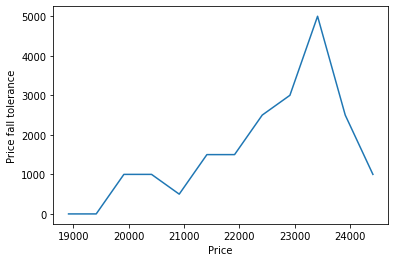

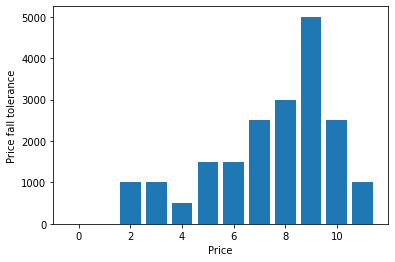

In [25]:
down_available = np.zeros((steps_count,), dtype=float)

for i in range(0,steps_count):
    down_available[i] = down_freq[i]*step_val
    
plt.plot(step_prices,down_available)
plt.xlabel('Price');
plt.ylabel('Price fall tolerance');
plt.show()

plt.bar(range(0,steps_count), down_available)
plt.xlabel('Price');
plt.ylabel('Price fall tolerance');
plt.show()

In [26]:
print("price down: min:",min(down_available),"avg:",sum(down_available)/steps_count,"max:",max(down_available))

price down: min: 0.0 avg: 1625.0 max: 5000.0
